In [1]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Read the data

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
real_state_data = pd.read_csv("clean_data_outlier1.csv")

# Review the DataFrame
real_state_data.head()

,Unnamed: 0,property_id,address,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type
0,0,318990176,"649 Hargraves Avenue NE, Royal City, WA 99357",Hargraves Avenue NE,Royal City,WA,46.906307,-119.622284,99357.0,399900.0,4.0,3.0,229.0,1742.0,17193.132,sqft,SINGLE_FAMILY
1,1,204997510,"15822 S Clear View Loop, Kennewick, WA 99338",S Clear View Loop,Kennewick,WA,46.190080,-119.318460,99338.0,799000.0,4.0,3.0,306.0,2611.0,26893.944,sqft,SINGLE_FAMILY
2,2,2064111934,"3602 3602/3600 W 15th Ave, Kennewick, WA 99338",3602/3600 W 15th Ave,Kennewick,WA,46.194970,-119.192780,99338.0,389000.0,4.0,2.0,167.0,2328.0,15681.600,sqft,MULTI_FAMILY
3,3,331355531,"6087 W 34th Ave, Kennewick, WA 99338",W 34th Ave,Kennewick,WA,46.178677,-119.204510,99338.0,525000.0,4.0,3.0,220.0,2380.0,9583.000,sqft,SINGLE_FAMILY
4,4,85939771,"1506 S Olson St, Kennewick, WA 99338",S Olson St,Kennewick,WA,46.194546,-119.172320,99338.0,350000.0,3.0,2.0,228.0,1529.0,12632.400,sqft,SINGLE_FAMILY


In [3]:
# Delete the unnamed column
real_state_data = real_state_data.drop('Unnamed: 0', axis=1)

# Display
real_state_data.head()

,property_id,address,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type
0,318990176,"649 Hargraves Avenue NE, Royal City, WA 99357",Hargraves Avenue NE,Royal City,WA,46.906307,-119.622284,99357.0,399900.0,4.0,3.0,229.0,1742.0,17193.132,sqft,SINGLE_FAMILY
1,204997510,"15822 S Clear View Loop, Kennewick, WA 99338",S Clear View Loop,Kennewick,WA,46.190080,-119.318460,99338.0,799000.0,4.0,3.0,306.0,2611.0,26893.944,sqft,SINGLE_FAMILY
2,2064111934,"3602 3602/3600 W 15th Ave, Kennewick, WA 99338",3602/3600 W 15th Ave,Kennewick,WA,46.194970,-119.192780,99338.0,389000.0,4.0,2.0,167.0,2328.0,15681.600,sqft,MULTI_FAMILY
3,331355531,"6087 W 34th Ave, Kennewick, WA 99338",W 34th Ave,Kennewick,WA,46.178677,-119.204510,99338.0,525000.0,4.0,3.0,220.0,2380.0,9583.000,sqft,SINGLE_FAMILY
4,85939771,"1506 S Olson St, Kennewick, WA 99338",S Olson St,Kennewick,WA,46.194546,-119.172320,99338.0,350000.0,3.0,2.0,228.0,1529.0,12632.400,sqft,SINGLE_FAMILY


In [4]:
illinois_data = real_state_data[real_state_data['state'] == "IL"]
illinois_data.head()

,property_id,address,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type
154960,115596923,"103 MOHAWK Drive, McClure, IL 62957",MOHAWK Drive,Mc Clure,IL,37.294560,-89.496590,62957.0,45000.0,2.0,1.0,46.0,960.0,7850.0,sqft,SINGLE_FAMILY
154961,115596895,"47 Chickasaw Drive, McClure, IL 62957",Chickasaw Drive,Mc Clure,IL,37.293495,-89.496254,62957.0,24900.0,3.0,1.0,22.0,1100.0,7840.8,sqft,SINGLE_FAMILY
154962,2066512946,"91 SEMINOLE Street, McClure, IL 62957",SEMINOLE Street,Mc Clure,IL,37.292690,-89.495430,62957.0,59900.0,3.0,1.0,54.0,1100.0,7840.8,sqft,SINGLE_FAMILY
154963,2066513355,"48 APACHE Circle, McClure, IL 62957",APACHE Circle,Mc Clure,IL,37.293236,-89.496560,62957.0,59900.0,3.0,1.0,54.0,1100.0,8276.4,sqft,SINGLE_FAMILY
154964,2066515031,"45 SIOUX Circle, McClure, IL 62957",SIOUX Circle,Mc Clure,IL,37.293880,-89.496570,62957.0,64900.0,2.0,1.0,54.0,1200.0,8712.0,sqft,SINGLE_FAMILY


In [5]:
# Set index to property_id
illinois_data = illinois_data.set_index('property_id')

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
illinois_data_scaled = StandardScaler().fit_transform(illinois_data[['latitude',
       'longitude', 'price', 'bedroom_number', 'bathroom_number', 'price_per_unit', 'living_space', 'land_space']])

In [7]:
# Create a DataFrame with the scaled data

# Copy the property id from the original data

df_illinois_scaled = pd.DataFrame(
    illinois_data_scaled,
    columns=['latitude',
       'longitude','price', 'bedroom_number', 'bathroom_number', 'price_per_unit', 'living_space', 'land_space']
)

# Set the property_id column as index
df_illinois_scaled["property_id"] = illinois_data.index
df_illinois_scaled = df_illinois_scaled.set_index("property_id")

# Display sample data
df_illinois_scaled.head()

,latitude,longitude,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space
property_id,,,,,,,,
115596923,-2.881122,-0.953677,-0.668797,-1.322815,-1.164093,-1.075521,-0.905939,-0.241520
115596895,-2.881965,-0.953321,-0.721869,-0.342815,-1.164093,-1.339832,-0.773144,-0.242964
2066512946,-2.882602,-0.952447,-0.629456,-0.342815,-1.164093,-0.987417,-0.773144,-0.242964
2066513355,-2.882170,-0.953645,-0.629456,-0.342815,-1.164093,-0.987417,-0.773144,-0.174613
2066515031,-2.881660,-0.953656,-0.616254,-1.322815,-1.164093,-0.987417,-0.678291,-0.106262


## Initialize the K-Means model

In [8]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_illinois_scaled)
    inertia.append(k_model.inertia_)

/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,142248.000000
1,2,107229.898754
2,3,85598.659041
3,4,74592.194259
4,5,67763.160003


In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
elbow_plot

/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [k]   (inertia)

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3)

In [13]:
# Fit the K-Means model using the scaled data
model.fit(df_illinois_scaled)

/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(df_illinois_scaled)

# Print the resulting array of cluster values.
print(clusters)

[2 2 2 ... 1 0 1]


In [15]:
# Create a copy of the DataFrame
df_illinois_predictions = df_illinois_scaled.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_illinois_predictions["cluster"] = clusters

# Display sample data
df_illinois_predictions.head()

,latitude,longitude,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,cluster
property_id,,,,,,,,,
115596923,-2.881122,-0.953677,-0.668797,-1.322815,-1.164093,-1.075521,-0.905939,-0.241520,2
115596895,-2.881965,-0.953321,-0.721869,-0.342815,-1.164093,-1.339832,-0.773144,-0.242964,2
2066512946,-2.882602,-0.952447,-0.629456,-0.342815,-1.164093,-0.987417,-0.773144,-0.242964,2
2066513355,-2.882170,-0.953645,-0.629456,-0.342815,-1.164093,-0.987417,-0.773144,-0.174613,2
2066515031,-2.881660,-0.953656,-0.616254,-1.322815,-1.164093,-0.987417,-0.678291,-0.106262,2


In [17]:
# Create a scatter plot using hvPlot
illinois_predictions_plot = df_illinois_predictions.hvplot.scatter(
    x="price",
    y="living_space",
    by="cluster",
    hover_cols = "property_id",
    xlabel = "Price",
    ylabel = "Living Space",
    title = "Illinois"
)
illinois_predictions_plot

/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [cluster]
   :Scatter   [price]   (living_space,property_id)

In [18]:
# Create a scatter plot using hvPlot
illinois_predictions_plot = df_illinois_predictions.hvplot.scatter(
    x="price",
    y="bedroom_number",
    by="cluster",
    hover_cols = "property_id",
    xlabel = "Price",
    ylabel = "Bedroom number",
    title = "Illinois"
)
illinois_predictions_plot

/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [cluster]
   :Scatter   [price]   (bedroom_number,property_id)

In [19]:
clusters = clusters.reshape(-1, 1)

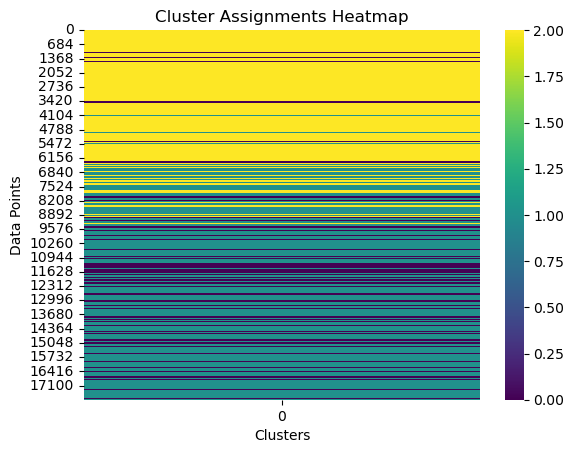

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cluster_assignments' contains the cluster labels assigned to each data point
# Replace 'cluster_assignments' with your actual cluster labels or similarity/distance matrix

# Example: Creating a heatmap for cluster assignments
sns.heatmap(clusters, cmap='viridis', annot=False)
plt.title('Cluster Assignments Heatmap')
plt.xlabel('Clusters')
plt.ylabel('Data Points')
plt.show()

## Optimize Clusters with Principal Component Analysis

In [21]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [22]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
illinois_pca = pca.fit_transform(df_illinois_scaled)

# View the first five rows of the DataFrame. 
illinois_pca[:5]

array([[-3.109791  ,  0.99912875,  0.75456131],
       [-2.82195203,  1.31768597, -0.00406643],
       [-2.64533665,  1.2177422 ,  0.2254518 ],
       [-2.64519201,  1.25291012,  0.24641456],
       [-2.95756774,  1.12736925,  0.83877409]])

In [23]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.43508565, 0.22571046, 0.09835303])

In [24]:
# Create a new DataFrame with the PCA data.
df_illinois_pca = pd.DataFrame(illinois_pca,
                            columns=["PC1", "PC2", "PC3"])

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_illinois_pca["property_id"] = illinois_data.index

# Set the property_id column as index

df_illinois_pca = df_illinois_pca.set_index("property_id")

# Display sample data
df_illinois_pca.head()

,PC1,PC2,PC3
property_id,,,
115596923,-3.109791,0.999129,0.754561
115596895,-2.821952,1.317686,-0.004066
2066512946,-2.645337,1.217742,0.225452
2066513355,-2.645192,1.252910,0.246415
2066515031,-2.957568,1.127369,0.838774


In [25]:
# Create a list with the number of k-values from 1 to 11
k_2 = list(range(1, 11))

In [26]:
# Create an empty list to store the inertia values
inertia_2=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data
# 3. Append the model.inertia_ to the inertia list

for i in k_2:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_illinois_pca)
    inertia_2.append(k_model.inertia_)

/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

In [27]:
# Create a dictionary with the data to plot the Elbow curve
elbow_pca = {"k": k_2, "inertia": inertia_2}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_pca)
df_elbow_pca.head()

,k,inertia
0,1,107987.447273
1,2,73413.080605
2,3,52162.523112
3,4,42250.287379
4,5,35950.816138


In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_plot = df_elbow_pca.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve using PCA data", 
    xticks=k_2
)
elbow_pca_plot

/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [k]   (inertia)

In [29]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=5)

In [30]:
# Fit the K-Means model using the PCA data
model.fit(df_illinois_pca)

/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [31]:
# Predict the clusters using the PCA data
k_3 = model.predict(df_illinois_pca)
# Print the resulting array of cluster values.
k_3

array([3, 3, 3, ..., 2, 2, 1], dtype=int32)

In [32]:
# Create a copy of the DataFrame with the PCA data
df_illinois_predictions_pca = df_illinois_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_illinois_predictions_pca["predicted_clusters"] = k_3

# Display sample data
df_illinois_predictions_pca.head()

,PC1,PC2,PC3,predicted_clusters
property_id,,,,
115596923,-3.109791,0.999129,0.754561,3
115596895,-2.821952,1.317686,-0.004066,3
2066512946,-2.645337,1.217742,0.225452,3
2066513355,-2.645192,1.252910,0.246415,3
2066515031,-2.957568,1.127369,0.838774,3


In [33]:
# Create a scatter plot using hvPlot
illinois_predictions_pca_plot = df_illinois_predictions_pca.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="predicted_clusters",
    hover_cols="property_id"
)
illinois_predictions_pca_plot

/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/user/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [predicted_clusters]
   :Scatter   [PC1]   (PC2,property_id)

In [34]:
from sklearn.decomposition import PCA

# Perform PCA on your dataset
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_illinois_scaled)

# Get the loadings (component loadings) associated with each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=['latitude',
       'longitude', 'price', 'bedroom_number', 'bathroom_number', 'price_per_unit', 'living_space', 'land_space'])

# Display the top contributing features for each principal component
for i, pc in enumerate(loadings_df.index):
    print(f"Principal Component {i + 1}:")
    features = loadings_df.iloc[i].abs().sort_values(ascending=False).head(3)
    print(features)
    print()

Principal Component 1:
price              0.460254
bathroom_number    0.444473
living_space       0.412802
Name: 0, dtype: float64

Principal Component 2:
land_space    0.508958
longitude     0.475412
latitude      0.438579
Name: 1, dtype: float64

Principal Component 3:
bedroom_number    0.589048
price_per_unit    0.540780
price             0.421872
Name: 2, dtype: float64

